<a href="https://colab.research.google.com/github/rithikkulkarni/ALDA-Course-Project/blob/main/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Importing labeled data
labeled_df = pd.read_csv('https://raw.githubusercontent.com/rithikkulkarni/ALDA-Course-Project/refs/heads/main/datasets/labeled_stock_tweets.csv')
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
 4   Label         80793 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [2]:
import pandas as pd

# Find the minimum count
min_count = labeled_df['Label'].value_counts().min()

# Create balanced DataFrame by sampling minimum instances from each group
balanced_df = labeled_df.groupby('Label').sample(n=min_count, random_state=42).reset_index(drop=True)

# Print count
print(balanced_df['Label'].value_counts())


Label
negative    8546
neutral     8546
positive    8546
Name: count, dtype: int64


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Define stopwords from nltk
stop_words = set(stopwords.words('english'))

ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_tweet(tweet, remove_stopwords=True, apply_stemming=True, apply_lemmatization=True):
    """
    Clean a tweet text by normalizing case, removing URLs, mentions, hashtags, numbers,
    special characters, and optionally applying stemming and lemmatization.

    Parameters:
        tweet (str): Tweet text to be cleaned
        remove_stopwords (bool): Whether to remove stopwords
        apply_stemming (bool): Whether to apply stemming to the words
        apply_lemmatization (bool): Whether to apply lemmatization to the words

    Returns:
        str: The cleaned tweet text
    """
    # Lowercase the tweet
    tweet = tweet.lower()

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet)

    # Replace @ mentions with a placeholder
    tweet = re.sub(r'@\w+', 'USER', tweet)

    # Remove hashtags but keep the words
    tweet = re.sub(r'#', '', tweet)

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Shrink words with overused repeated letters (e.g., "soooo" -> "so")
    tweet = re.sub(r'(.)\1{2,}', r'\1', tweet)

    # Tokenize the tweet into words
    words = tweet.split()

    # Remove stopwords
    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    # Apply stemming
    if apply_stemming:
        words = [ps.stem(word) for word in words]

    # Apply lemmatization
    if apply_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]

    # Rejoin the words into a single string
    return ' '.join(words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
labeled_df['Cleaned_Tweet'] = labeled_df['Tweet'].apply(lambda x: clean_tweet(str(x)))

In [5]:
labeled_df.head(50)

,Date,Tweet,Stock Name,Company Name,Label,Cleaned_Tweet
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",neutral,mainstream medium done amaz job brainwash peop...
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",neutral,tesla deliveri estim around k analyst tsla
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",neutral,even includ unvest rsu addit equiti need rsu x...
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",neutral,user user user hahaha still tri stop tesla fsd...
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",negative,user user stop tri kill kid sad derang old man
5,2022-09-29 22:25:53+00:00,@RealDanODowd @Tesla This is you https://t.co/...,TSLA,"Tesla, Inc.",neutral,user user
6,2022-09-29 22:24:22+00:00,For years @WholeMarsBlog viciously silenced @T...,TSLA,"Tesla, Inc.",neutral,year user vicious silenc user critic fail sile...
7,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,TSLA,"Tesla, Inc.",neutral,nio im money doesnt mean bad invest whole mark...
8,2022-09-29 22:23:28+00:00,50 likes for some $SPY $TSLA charts to study!\...,TSLA,"Tesla, Inc.",neutral,like spi tsla chart studi
9,2022-09-29 22:15:01+00:00,@MrJames__321 @KellyRoofing @TeslaSolar @elonm...,TSLA,"Tesla, Inc.",negative,user user user user user powerwal waterproof c...


In [6]:
# Find the minimum count across the classes
min_count = labeled_df['Label'].value_counts().min()

# Create a balanced DataFrame by sampling min_count instances from each group
balanced_df = labeled_df.groupby('Label').sample(n=min_count, random_state=42).reset_index(drop=True)

# Display the count of each class to verify balance
print(balanced_df['Label'].value_counts())

Label
negative    8546
neutral     8546
positive    8546
Name: count, dtype: int64


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Divide dataframe into explanatory and response variable, randomly sampled balanced subset of dataframe
X = balanced_df['Cleaned_Tweet']
y = balanced_df['Label']

# Vectorize tweets using TF-IDF
vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(X)

# 20% train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42
)

# Train logistic regression model on data
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 5: Evaluate the model on the test set
y_pred = lr_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7320592823712948
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.74      0.76      1738
     neutral       0.69      0.69      0.69      1693
    positive       0.73      0.76      0.75      1697

    accuracy                           0.73      5128
   macro avg       0.73      0.73      0.73      5128
weighted avg       0.73      0.73      0.73      5128



In [8]:
import pandas as pd
import yfinance as yf
from datetime import timedelta

# Assume balanced_df already exists and has columns 'Date' and 'Stock Name'
balanced_df['Date'] = pd.to_datetime(balanced_df['Date']).dt.date

# Drop any previously added columns that might cause merge errors
cols_to_drop = ['stock_label']
balanced_df = balanced_df.drop(columns=[col for col in cols_to_drop if col in balanced_df.columns])

def get_stock_labels(ticker, dates):
    """
    Download stock data for a given ticker and date range (based on dates from the DataFrame),
    then calculate the next-day percent change and label the movement as 'up', 'down', or 'neutral'.
    Returns a DataFrame with Date, ticker, and stock_label.
    """
    start_date = min(dates) - timedelta(days=1)
    end_date = max(dates) + timedelta(days=2)

    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(f"Downloading data for {ticker}, initial columns:", stock_data.columns)

    # Flatten columns if they are a MultiIndex
    if isinstance(stock_data.columns, pd.MultiIndex):
        stock_data.columns = stock_data.columns.get_level_values(0)

    # Use 'Close' or 'Adj Close'
    if 'Close' not in stock_data.columns:
        if 'Adj Close' in stock_data.columns:
            stock_data['Close'] = stock_data['Adj Close']
            print("Using 'Adj Close' as 'Close'")
        else:
            raise KeyError("Neither 'Close' nor 'Adj Close' found in the stock data.")

    # Convert index to date objects
    stock_data.index = pd.to_datetime(stock_data.index).date

    # Create 'next_close' column by shifting the 'Close' column by -1 (next day)
    stock_data['next_close'] = stock_data['Close'].shift(-1)
    # Drop rows where next_close is NaN (usually the last row)
    stock_data = stock_data.dropna(subset=['next_close'])

    # Calculate percentage change between today's close and next day's close
    stock_data['pct_change'] = (stock_data['next_close'] - stock_data['Close']) / stock_data['Close']

    # Label the movement: change > 1.5% is 'up', change < -1.5% is 'down', else 'neutral'
    def label_movement(pct):
        if pct > 0.015:
            return 'up'
        elif pct < -0.015:
            return 'down'
        else:
            return 'neutral'

    stock_data['stock_label'] = stock_data['pct_change'].apply(label_movement)

    # Create a DataFrame with Date, ticker, and stock_label.
    stock_labels = stock_data[['stock_label']].copy()
    stock_labels = stock_labels.reset_index().rename(columns={'index': 'Date'})
    stock_labels['Stock Name'] = ticker
    return stock_labels

# List to hold the labeled subsets for each ticker.
labeled_dfs = []

# Process each unique ticker found in the DataFrame.
for t in balanced_df['Stock Name'].unique():
    subset = balanced_df[balanced_df['Stock Name'] == t].copy()
    dates = subset['Date']
    print(f"Processing ticker: {t}, with date range {min(dates)} to {max(dates)}")

    # Get the stock labels for this ticker
    stock_labels = get_stock_labels(t, dates)

    # Merge on both 'Date' and 'Stock Name'
    merged = pd.merge(subset, stock_labels, on=['Date', 'Stock Name'], how='inner')
    labeled_dfs.append(merged)

# Combine all labeled subsets into one DataFrame
balanced_df = pd.concat(labeled_dfs, ignore_index=True)
print("Labeled DataFrame head:\n", balanced_df.head())


Processing ticker: TSLA, with date range 2021-09-30 to 2022-09-29
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'TSLA'),
            (   'Low', 'TSLA'),
            (  'Open', 'TSLA'),
            ('Volume', 'TSLA')],
           names=['Price', 'Ticker'])
Processing ticker: XPEV, with date range 2021-10-07 to 2022-09-26
            (  'High', 'XPEV'),
            (   'Low', 'XPEV'),
            (  'Open', 'XPEV'),
            ('Volume', 'XPEV')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Processing ticker: PYPL, with date range 2021-10-05 to 2022-09-29
            (  'High', 'PYPL'),
            (   'Low', 'PYPL'),
            (  'Open', 'PYPL'),
            ('Volume', 'PYPL')],
           names=['Price', 'Ticker'])
Processing ticker: MSFT, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'MSFT'),
            (   'Low', 'MSFT'),
            (  'Open', 'MSFT'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])
Processing ticker: META, with date range 2021-09-30 to 2022-09-29
            (  'High', 'META'),
            (   'Low', 'META'),
            (  'Open', 'META'),
            ('Volume', 'META')],
           names=['Price', 'Ticker'])
Processing ticker: DIS, with date range 2021-10-07 to 2022-09-28


[*********************100%***********************]  1 of 1 completed


            (  'High', 'DIS'),
            (   'Low', 'DIS'),
            (  'Open', 'DIS'),
            ('Volume', 'DIS')],
           names=['Price', 'Ticker'])
Processing ticker: AAPL, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed


            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Processing ticker: AMZN, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed


            (  'High', 'AMZN'),
            (   'Low', 'AMZN'),
            (  'Open', 'AMZN'),
            ('Volume', 'AMZN')],
           names=['Price', 'Ticker'])
Processing ticker: PG, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed


            (  'High', 'PG'),
            (   'Low', 'PG'),
            (  'Open', 'PG'),
            ('Volume', 'PG')],
           names=['Price', 'Ticker'])
Processing ticker: TSM, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'TSM'),
            (   'Low', 'TSM'),
            (  'Open', 'TSM'),
            ('Volume', 'TSM')],
           names=['Price', 'Ticker'])
Processing ticker: NFLX, with date range 2021-09-30 to 2022-09-29
            (  'High', 'NFLX'),
            (   'Low', 'NFLX'),
            (  'Open', 'NFLX'),
            ('Volume', 'NFLX')],
           names=['Price', 'Ticker'])
Processing ticker: NIO, with date range 2021-09-30 to 2022-09-29


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'NIO'),
            (   'Low', 'NIO'),
            (  'Open', 'NIO'),
            ('Volume', 'NIO')],
           names=['Price', 'Ticker'])
Processing ticker: GOOG, with date range 2021-10-01 to 2022-09-28
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])
Processing ticker: VZ, with date range 2021-10-12 to 2022-09-26


[*********************100%***********************]  1 of 1 completed


            (  'High', 'VZ'),
            (   'Low', 'VZ'),
            (  'Open', 'VZ'),
            ('Volume', 'VZ')],
           names=['Price', 'Ticker'])
Processing ticker: COST, with date range 2021-10-06 to 2022-09-25


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'COST'),
            (   'Low', 'COST'),
            (  'Open', 'COST'),
            ('Volume', 'COST')],
           names=['Price', 'Ticker'])
Processing ticker: AMD, with date range 2021-09-30 to 2022-09-29
            (  'High', 'AMD'),
            (   'Low', 'AMD'),
            (  'Open', 'AMD'),
            ('Volume', 'AMD')],
           names=['Price', 'Ticker'])
Processing ticker: INTC, with date range 2021-10-14 to 2022-09-29


[*********************100%***********************]  1 of 1 completed


            (  'High', 'INTC'),
            (   'Low', 'INTC'),
            (  'Open', 'INTC'),
            ('Volume', 'INTC')],
           names=['Price', 'Ticker'])
Processing ticker: BA, with date range 2021-10-08 to 2022-09-25


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'BA'),
            (   'Low', 'BA'),
            (  'Open', 'BA'),
            ('Volume', 'BA')],
           names=['Price', 'Ticker'])
Processing ticker: ENPH, with date range 2021-10-19 to 2022-09-23
            (  'High', 'ENPH'),
            (   'Low', 'ENPH'),
            (  'Open', 'ENPH'),
            ('Volume', 'ENPH')],
           names=['Price', 'Ticker'])
Processing ticker: ZS, with date range 2021-10-13 to 2022-09-28


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            (  'High', 'ZS'),
            (   'Low', 'ZS'),
            (  'Open', 'ZS'),
            ('Volume', 'ZS')],
           names=['Price', 'Ticker'])
Processing ticker: CRM, with date range 2021-10-01 to 2022-09-22
            (  'High', 'CRM'),
            (   'Low', 'CRM'),
            (  'Open', 'CRM'),
            ('Volume', 'CRM')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Processing ticker: BX, with date range 2021-10-21 to 2022-08-25
            (  'High', 'BX'),
            (   'Low', 'BX'),
            (  'Open', 'BX'),
            ('Volume', 'BX')],
           names=['Price', 'Ticker'])
Processing ticker: KO, with date range 2021-10-06 to 2022-09-29


[*********************100%***********************]  1 of 1 completed


            (  'High', 'KO'),
            (   'Low', 'KO'),
            (  'Open', 'KO'),
            ('Volume', 'KO')],
           names=['Price', 'Ticker'])
Processing ticker: F, with date range 2021-10-07 to 2022-08-19


[*********************100%***********************]  1 of 1 completed


            (  'High', 'F'),
            (   'Low', 'F'),
            (  'Open', 'F'),
            ('Volume', 'F')],
           names=['Price', 'Ticker'])
Processing ticker: NOC, with date range 2022-02-25 to 2022-08-19


[*********************100%***********************]  1 of 1 completed

            (  'High', 'NOC'),
            (   'Low', 'NOC'),
            (  'Open', 'NOC'),
            ('Volume', 'NOC')],
           names=['Price', 'Ticker'])
Labeled DataFrame head:
          Date                                              Tweet Stock Name  \
0  2021-11-05  $MSFT $GOOG $NVDA $DVA are superior S&amp;P500...       TSLA   
1  2022-04-27  A $TSLA share a day keeps Bill Gates away http...       TSLA   
2  2022-08-17  Volatility kicks in at T-minus 6 minutes. Buck...       TSLA   
3  2021-10-26  The drivers in LA are horrendously bad. The to...       TSLA   
4  2022-05-10  I fired my financial advisor 3 years ago after...       TSLA   

  Company Name     Label                                      Cleaned_Tweet  \
0  Tesla, Inc.  negative  msft goog nvda dva superior sampp stock wellsu...   
1  Tesla, Inc.  negative                 tsla share day keep bill gate away   
2  Tesla, Inc.  negative  volatil kick tminu minut buckl think fomc minu...   
3  Tesla, Inc.  negat

In [9]:
print(balanced_df.stock_label.value_counts())
print(balanced_df.describe())

stock_label
neutral    8129
up         6545
down       6261
Name: count, dtype: int64
              Date                         Tweet Stock Name Company Name  \
count        20935                         20935      20935        20935   
unique         252                         17741         25           25   
top     2022-02-03  $TSLA will triple in 2022 🚀🌕       TSLA  Tesla, Inc.   
freq           456                            21       9785         9785   

           Label Cleaned_Tweet stock_label  
count      20935         20935       20935  
unique         3         17505           3  
top     negative    tsla tripl     neutral  
freq        7232            31        8129  


In [10]:
def sentiment_to_number(sentiment):
    mapping = {
        "positive": 1,
        "neutral": 0,
        "negative": -1
    }
    # Normalize the input to lowercase to ensure consistency
    return mapping.get(sentiment.lower(), 0)
balanced_df['Label'] = balanced_df['Label'].apply(sentiment_to_number)
balanced_df.head(25)

,Date,Tweet,Stock Name,Company Name,Label,Cleaned_Tweet,stock_label
0,2021-11-05,$MSFT $GOOG $NVDA $DVA are superior S&amp;P500...,TSLA,"Tesla, Inc.",-1,msft goog nvda dva superior sampp stock wellsu...,down
1,2022-04-27,A $TSLA share a day keeps Bill Gates away http...,TSLA,"Tesla, Inc.",-1,tsla share day keep bill gate away,neutral
2,2022-08-17,Volatility kicks in at T-minus 6 minutes. Buck...,TSLA,"Tesla, Inc.",-1,volatil kick tminu minut buckl think fomc minu...,neutral
3,2021-10-26,The drivers in LA are horrendously bad. The to...,TSLA,"Tesla, Inc.",-1,driver la horrend bad tourist even wors need f...,up
4,2022-05-10,I fired my financial advisor 3 years ago after...,TSLA,"Tesla, Inc.",-1,fire financi advisor year ago scald cash k rot...,down
5,2022-08-02,Tesla continues to rally into the annual meeti...,TSLA,"Tesla, Inc.",-1,tesla continu ralli annual meet know make reco...,up
6,2021-11-10,"In '99 at its pre-crash peak, $AMZN had revenu...",TSLA,"Tesla, Inc.",-1,precrash peak amzn revenu b net incom loss tra...,neutral
7,2022-06-02,@smallwhaleee @scottfarkas @elonmusk @Tesla Yo...,TSLA,"Tesla, Inc.",-1,user user user user mean lazi peopl cant commi...,down
8,2022-07-14,Market Recap:\nhttps://t.co/41JPe5rQYs\nCPI Re...,TSLA,"Tesla, Inc.",-1,market recap cpi review peak inflat peak dejav...,neutral
9,2022-05-03,Anyone ordering a semi? $20k deposit.. I’m thi...,TSLA,"Tesla, Inc.",-1,anyon order semi k deposit im think order one ...,up


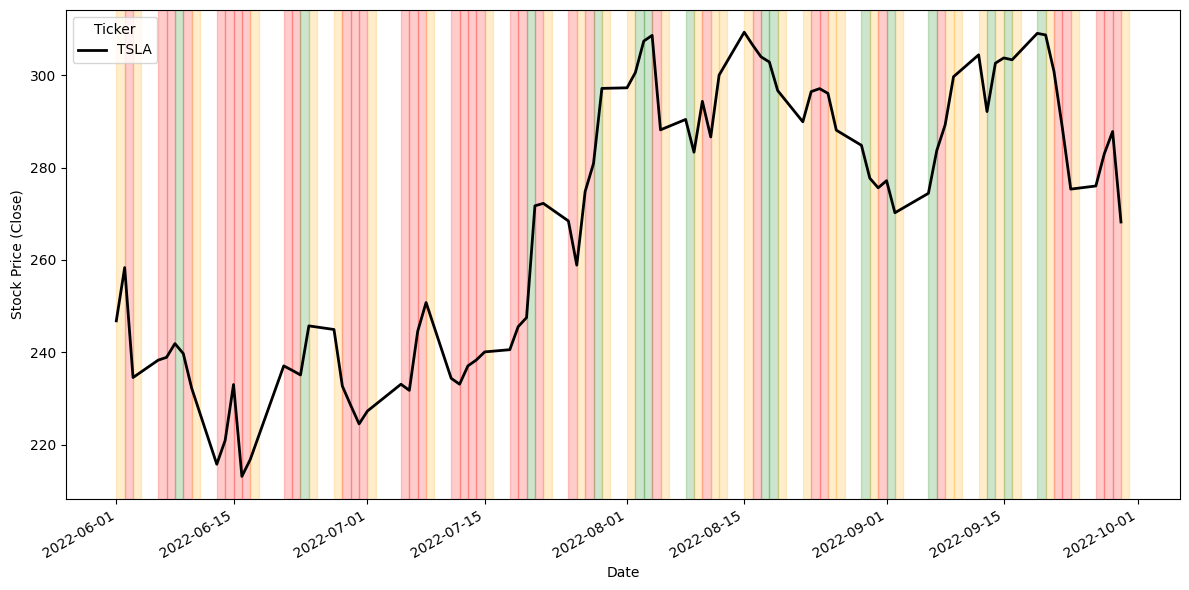

,Date,Tweet,Stock Name,Company Name,Label,Cleaned_Tweet,stock_label,one_day_price,two_day_price,three_day_price,historical_price
2,2022-08-17,Volatility kicks in at T-minus 6 minutes. Buck...,TSLA,"Tesla, Inc.",-1,volatil kick tminu minut buckl think fomc minu...,neutral,306.56,309.32,300.03,297.77
5,2022-08-02,Tesla continues to rally into the annual meeti...,TSLA,"Tesla, Inc.",-1,tesla continu ralli annual meet know make reco...,up,297.28,297.15,280.90,268.63
7,2022-06-02,@smallwhaleee @scottfarkas @elonmusk @Tesla Yo...,TSLA,"Tesla, Inc.",-1,user user user user mean lazi peopl cant commi...,down,246.79,252.75,253.21,233.70
8,2022-07-14,Market Recap:\nhttps://t.co/41JPe5rQYs\nCPI Re...,TSLA,"Tesla, Inc.",-1,market recap cpi review peak inflat peak dejav...,neutral,237.04,233.07,234.34,234.48
10,2022-07-22,$TSLA +0.2% to $817 pre-mkt following yesterda...,TSLA,"Tesla, Inc.",-1,tsla premkt follow yesterday move earn equiti ...,neutral,271.71,247.50,245.53,243.95


In [38]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from datetime import timedelta
from scipy import stats

# This cell creates a graph that has sentiment scores as the shaded background color along with the stock price movement. We also
# shifted the sentiment scores back 1 day so we could see their affects 24 hours after

# Example input
ticker = "TSLA"
days_back = 120

# Filter tweets by company and recent "days_back" days
df = balanced_df.copy()
df['Date'] = pd.to_datetime(df['Date'])

end_date = df['Date'].max()
start_date = end_date - timedelta(days=days_back)

filtered_df = df[(df['Stock Name'].str.lower() == ticker.lower()) &
                 (df['Date'] >= start_date) &
                 (df['Date'] <= end_date)]

# Group sentiment by date
daily_sentiment = filtered_df.groupby(filtered_df['Date'].dt.date)['Label'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'neutral'
)

# Shifting sentiment to affect 24 hours after
daily_sentiment.index = pd.to_datetime(daily_sentiment.index) - pd.Timedelta(days=1)
daily_sentiment.index = daily_sentiment.index.date

# Fetch stock data from yfinance
stock_data = yf.download(ticker, start=start_date.strftime('%Y-%m-%d'),
                         end=(end_date + timedelta(days=1)).strftime('%Y-%m-%d'),
                         progress=False)

# Plot stock closing prices
fig, ax = plt.subplots(figsize=(12, 6))
stock_data['Close'].plot(ax=ax, color='black', linewidth=2)
ax.set_ylabel("Stock Price (Close)")
ax.set_xlabel("Date")

# 6. Shade background per day
for i, day in enumerate(stock_data.index.date):
    sentiment = daily_sentiment.get(day, 0)
    if sentiment > 0:
        color = 'green'
    elif sentiment < 0:
        color = 'red'
    else:
        color = 'orange'

    ax.axvspan(day, day + timedelta(days=1), color=color, alpha=0.2)

plt.tight_layout()
plt.show()
filtered_df.head()


In [13]:
print(balanced_df.head(5))
print(df.head(5))

         Date                                              Tweet Stock Name  \
0  2021-11-05  $MSFT $GOOG $NVDA $DVA are superior S&amp;P500...       TSLA   
1  2022-04-27  A $TSLA share a day keeps Bill Gates away http...       TSLA   
2  2022-08-17  Volatility kicks in at T-minus 6 minutes. Buck...       TSLA   
3  2021-10-26  The drivers in LA are horrendously bad. The to...       TSLA   
4  2022-05-10  I fired my financial advisor 3 years ago after...       TSLA   

  Company Name  Label                                      Cleaned_Tweet  \
0  Tesla, Inc.     -1  msft goog nvda dva superior sampp stock wellsu...   
1  Tesla, Inc.     -1                 tsla share day keep bill gate away   
2  Tesla, Inc.     -1  volatil kick tminu minut buckl think fomc minu...   
3  Tesla, Inc.     -1  driver la horrend bad tourist even wors need f...   
4  Tesla, Inc.     -1  fire financi advisor year ago scald cash k rot...   

  stock_label  
0        down  
1     neutral  
2     neutral  
3   

In [34]:
import yfinance as yf
import pandas as pd
from datetime import timedelta

# NUM HISTORICAL DAYS
n = 15

# Ensure Date column is in datetime format
balanced_df['Date'] = pd.to_datetime(balanced_df['Date'])

# Get the unique ticker symbols from the DataFrame
tickers = balanced_df['Stock Name'].unique()

# Create a dictionary to store historical data for each ticker
price_data = {}

for ticker in tickers:
    # Get all dates for this ticker
    ticker_dates = pd.to_datetime(balanced_df[balanced_df['Stock Name'] == ticker]['Date'])
    # Define a start date for downloading data. Adjust timedelta as needed (e.g., if you need a 90-day window, subtract 120 days)
    start_date = (ticker_dates.min() - timedelta(days=n)).strftime('%Y-%m-%d')
    # Define an end date slightly beyond the latest date in your data to ensure coverage
    end_date = (ticker_dates.max() + timedelta(days=1)).strftime('%Y-%m-%d')

    # Download historical data for the ticker
    df_ticker = yf.download(ticker, start=start_date, end=end_date, progress=False)
    price_data[ticker] = df_ticker

def get_features(row):
    ticker = row['Stock Name']
    date = row['Date']

    # Get the pre-downloaded historical data for this ticker
    df = price_data.get(ticker)

    if df is None or df.empty:
        return pd.Series([None, None, None, None])

    # Filter data for dates strictly before the given date
    df_filtered = df[df.index < date]

    if len(df_filtered) < 3:
        return pd.Series([None, None, None, None])

    # Get the last three available closing prices
    one_day_price = df_filtered['Close'].iloc[-1]
    two_day_price = df_filtered['Close'].iloc[-2]
    three_day_price = df_filtered['Close'].iloc[-3]

    # Calculate the average closing price over the past n days (adjust timedelta if needed for our window)
    df_window = df_filtered[df_filtered.index >= (date - timedelta(days=n))]
    historical_price = df_window['Close'].mean() if not df_window.empty else None

    return pd.Series([one_day_price, two_day_price, three_day_price, historical_price])

# Apply the get_features function to each row
balanced_df[['one_day_price', 'two_day_price', 'three_day_price', 'historical_price']] = balanced_df.apply(get_features, axis=1)


In [35]:
### Converting the extracted historical price features into just their floating point values (converted to nearest dollars.cents)

def extract_single_value(x):
    """
    If x is a Pandas Series with one element, extract and return that element.
    Otherwise, return x unchanged.
    """
    if isinstance(x, pd.Series) and x.size == 1:
        return x.iloc[0]
    return x

# List the price feature columns that need cleaning
price_columns = ['one_day_price', 'two_day_price', 'three_day_price', 'historical_price']

# Apply the function to just those columns using applymap
balanced_df[price_columns] = balanced_df[price_columns].applymap(extract_single_value)

# Optionally, round the values to two decimal places if needed:
balanced_df[price_columns] = balanced_df[price_columns].astype(float).round(2)

<ipython-input-35-5095b1dbcdb5>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  balanced_df[price_columns] = balanced_df[price_columns].applymap(extract_single_value)


In [36]:
print(balanced_df.head(1000)['one_day_price'][999])

237.04


In [37]:
balanced_df.head(10)

,Date,Tweet,Stock Name,Company Name,Label,Cleaned_Tweet,stock_label,one_day_price,two_day_price,three_day_price,historical_price
0,2021-11-05,$MSFT $GOOG $NVDA $DVA are superior S&amp;P500...,TSLA,"Tesla, Inc.",-1,msft goog nvda dva superior sampp stock wellsu...,down,409.97,404.62,390.67,360.61
1,2022-04-27,A $TSLA share a day keeps Bill Gates away http...,TSLA,"Tesla, Inc.",-1,tsla share day keep bill gate away,neutral,292.14,332.67,335.02,329.74
2,2022-08-17,Volatility kicks in at T-minus 6 minutes. Buck...,TSLA,"Tesla, Inc.",-1,volatil kick tminu minut buckl think fomc minu...,neutral,306.56,309.32,300.03,297.77
3,2021-10-26,The drivers in LA are horrendously bad. The to...,TSLA,"Tesla, Inc.",-1,driver la horrend bad tourist even wors need f...,up,341.62,303.23,298.00,287.84
4,2022-05-10,I fired my financial advisor 3 years ago after...,TSLA,"Tesla, Inc.",-1,fire financi advisor year ago scald cash k rot...,down,262.37,288.55,291.09,296.82
5,2022-08-02,Tesla continues to rally into the annual meeti...,TSLA,"Tesla, Inc.",-1,tesla continu ralli annual meet know make reco...,up,297.28,297.15,280.90,268.63
6,2021-11-10,"In '99 at its pre-crash peak, $AMZN had revenu...",TSLA,"Tesla, Inc.",-1,precrash peak amzn revenu b net incom loss tra...,neutral,341.17,387.65,407.36,378.19
7,2022-06-02,@smallwhaleee @scottfarkas @elonmusk @Tesla Yo...,TSLA,"Tesla, Inc.",-1,user user user user mean lazi peopl cant commi...,down,246.79,252.75,253.21,233.70
8,2022-07-14,Market Recap:\nhttps://t.co/41JPe5rQYs\nCPI Re...,TSLA,"Tesla, Inc.",-1,market recap cpi review peak inflat peak dejav...,neutral,237.04,233.07,234.34,234.48
9,2022-05-03,Anyone ordering a semi? $20k deposit.. I’m thi...,TSLA,"Tesla, Inc.",-1,anyon order semi k deposit im think order one ...,up,300.98,290.25,292.50,316.08


In [39]:
balanced_df.to_csv('labeled_stock_tweets_with_historical_prices.csv', index=False)